The goal of this notebook is to take a closer look into the iteration-by-iteration
decisions made by the algorithms.

In [1]:
import json
import os

import torch
from torch import Tensor

%matplotlib inline
import matplotlib.pyplot as plt

current_dir = os.getcwd()



def get_output_dicts(dirname: str, label: str) -> list:
    exp_dir = os.path.join(current_dir, dirname)
    config_path = os.path.join(exp_dir, "config.json")

    with open(config_path, "r") as f:
        config_dict = json.load(f)
        print(f"Config: \n {json.dumps(config_dict, indent=4)}")

    # get all the output files
    directory_list = os.listdir(exp_dir)
    output_files = [
        os.path.join(exp_dir, file) for file in directory_list if file[-3:] == ".pt"
    ]
    # read all outputs into a list
    output_dicts = list()
    for file_path in output_files:
        dict = torch.load(file_path)
        if dict["label"] == label:
            output_dicts.append(torch.load(file_path))
    output_count = len(output_dicts)
    print(f"Read {output_count} output files.")
    return output_dicts


def plot_2d_X(X: Tensor):
    r"""This one plots arms in blue, contexts in orange"""
    x = torch.arange(X.shape[0])
    fig = plt.figure(figsize=(12, 8))
    fig.patch.set_facecolor('xkcd:mint green')
    scale = X.max()
    plt.scatter(x, X[..., 0] / scale, label="X_0")
    plt.scatter(x, X[..., 1], label="X_1")
    plt.grid()
    plt.legend()
    plt.show()


def plot_2d_X_v2(X: Tensor):
    r"""This one produces one subplot for each arm"""
    x = torch.arange(X.shape[0])
    num_arms = int(X.max() + 1)
    fig, ax = plt.subplots(num_arms // 2, 2, figsize=(12, num_arms * 2))
    fig.patch.set_facecolor('xkcd:mint green')
    for i in range(num_arms):
        mask = X[..., 0] == i
        ax[i // 2, i % 2].scatter(x[mask], X[..., 1][mask])
        ax[i // 2, i % 2].grid()
    plt.show()

In [2]:
# dirname = "config_00"
# label = "LCEGP"
# output = get_output_dicts(dirname, label)
# for out in output:
#     print(out["X"].shape)

Config: 
 {
    "iterations": 400,
    "fit_frequency": 25,
    "fit_tries": 10,
    "num_arms": 10,
    "num_contexts": 20,
    "context_dim": 5,
    "num_fantasies": 0,
    "ground_truth_kwargs": {
        "function": "hartmann"
    },
    "batch_size": 5
}
Read 30 output files.


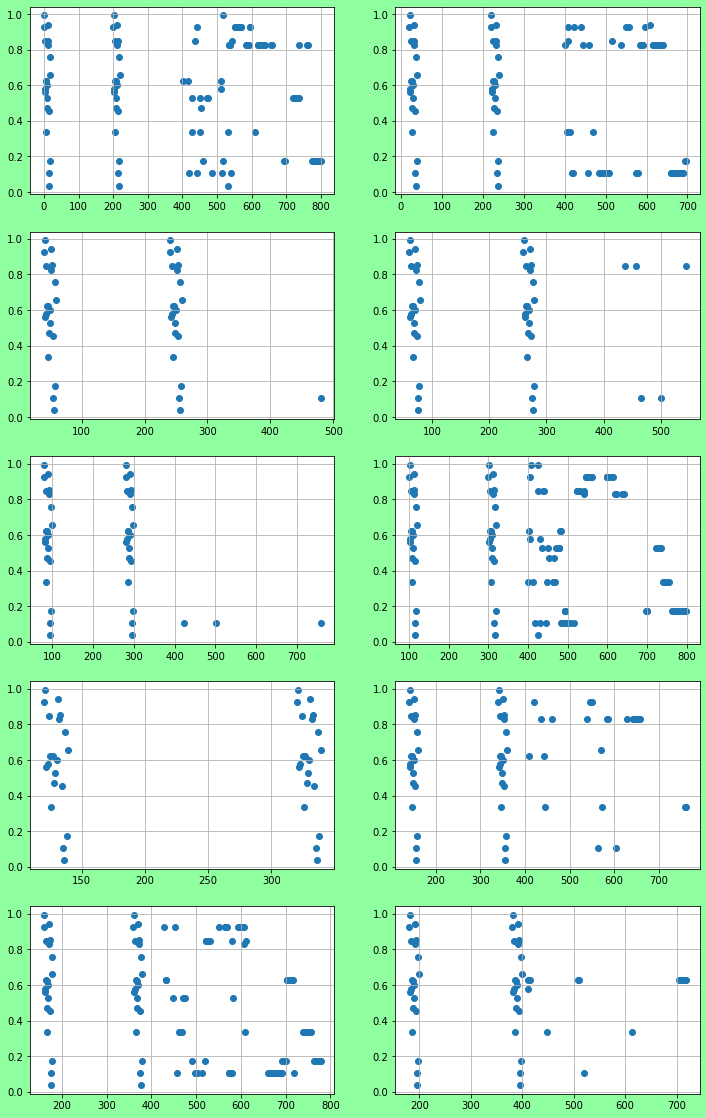

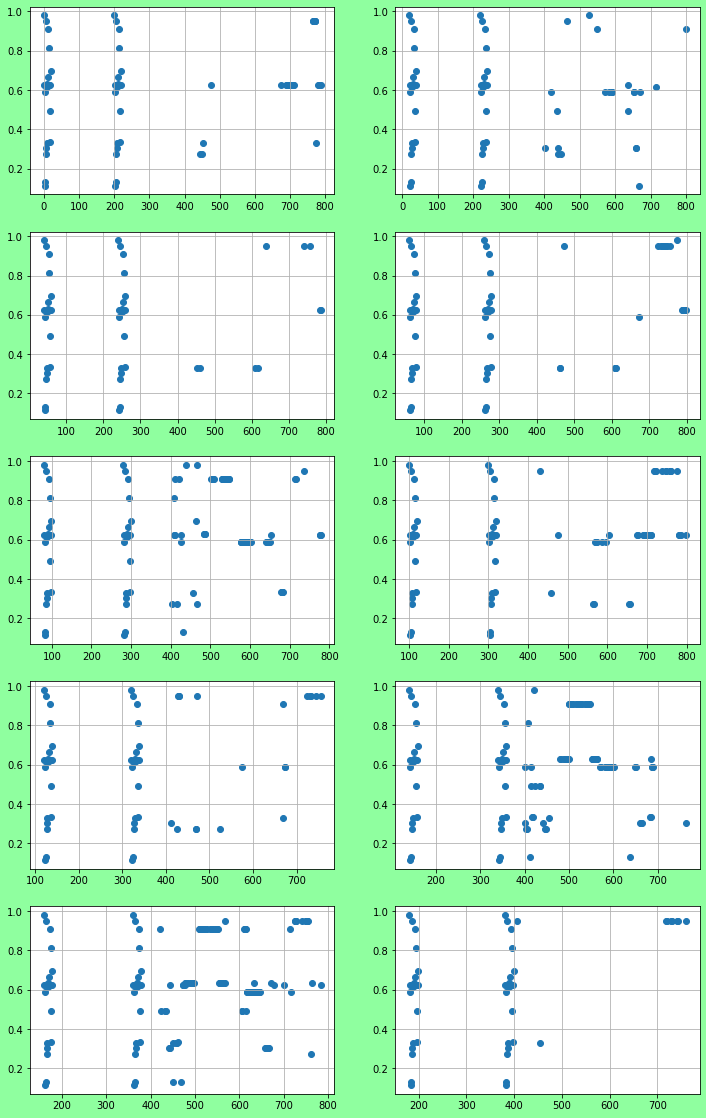

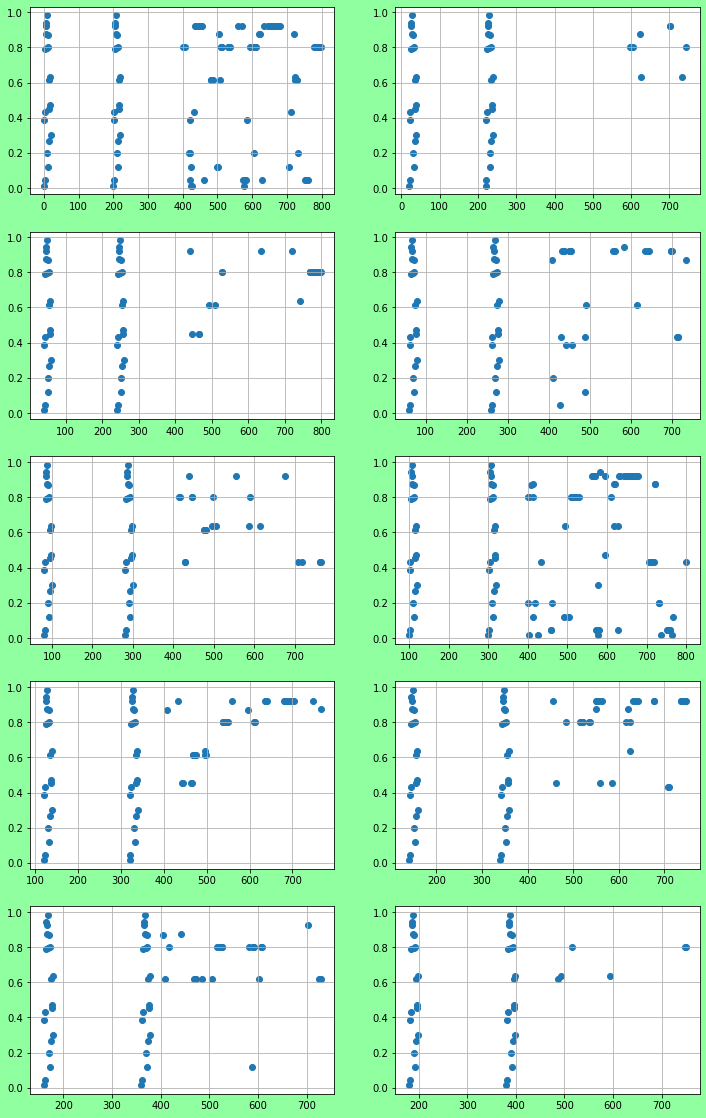

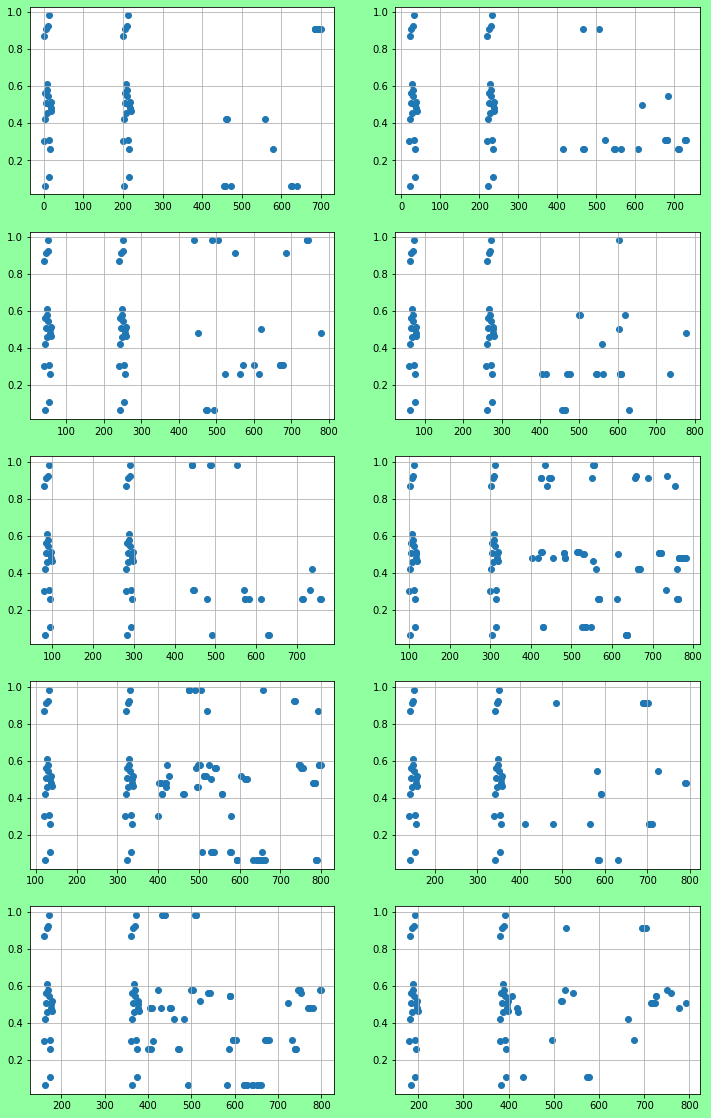

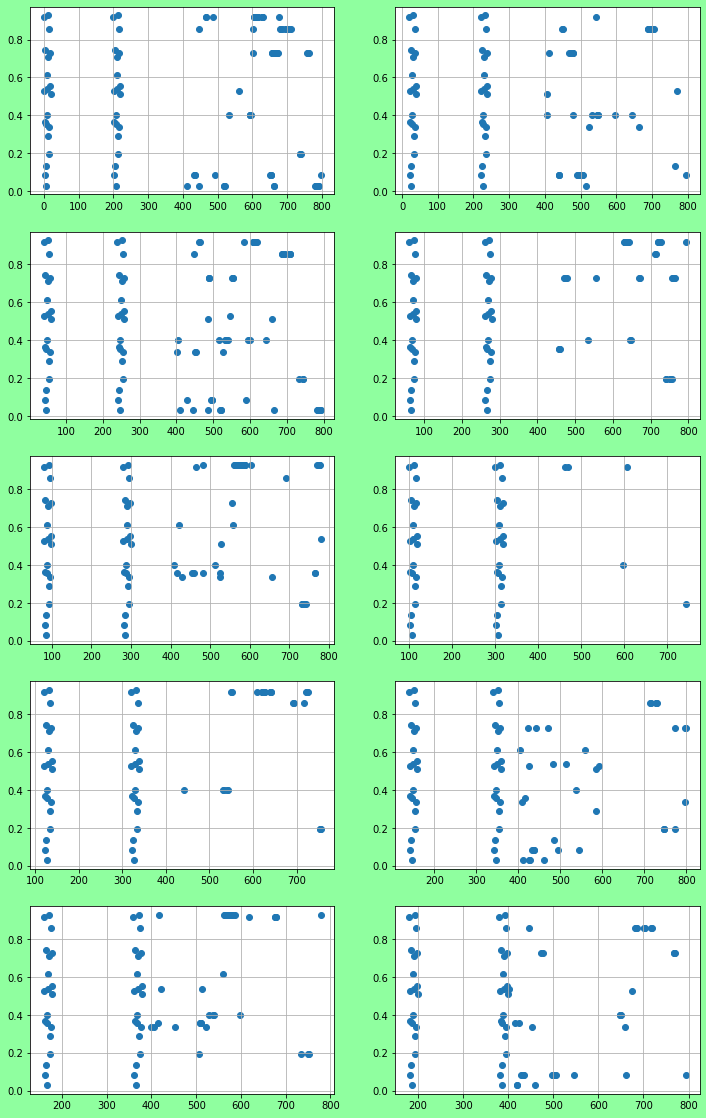

In [4]:
dirname = "config_h_4"

# label = "LCEGP"
label = "ML_IKG"

output = get_output_dicts(dirname, label)

for seed in range(5):
    t_X = output[seed]["X"]
    plot_2d_X_v2(t_X)
